<p align="center">
    <img src="https://github.com/GuitarsAI/MRSP_Notebooks/blob/master/images/msp_header.png?raw=1">
</p>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta



# Frequency Response

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/7XWrH9IV-EA" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

If we have coefficients of a Finite Impulse Response (FIR) filter h, or in general the impulse response, its frequency response becomes (using the Discrete Time Fourier Transform):

$$\large H( ω )  = \sum _ {n = - ∞} ^∞ {h( n )  e^{- j n ω}}
$$

So here we already have 2 different ways to describe a system or a signal, by its **impulse response** in the time or space domain (depending on if it is audio or images), and by **its frequency response**. They are related by this Discrete Time Fourier Transform.

**Example:** If we have an amplifier which is described by its **frequency response** (including the phase), then we can obtain the time domain version, its **impulse response** by taking the inverse Fourier Transform of its frequency response. This can be seen as the output of our amplifier if the input is a single impulse (because an impulse has a flat spectrum, and hence the name “impulse response”). The output of the amplifier is then the convolution of the input signal (in time-domain) with the impulse response.

In practice usually an impulse is not used (not enough energy or it could destroy the system) but often white noise is input into our amplifier, and then the output is Fourier transformed to obtain its frequency response. White noise has the advantage that it has more energy without destroying the system, and it has an approximately constant spectrum (like the impulse).
Another often used method is a sweeping sinusoid, with increasing frequency and constant amplitude. This often gives more precise results but takes longer to measure. The resulting measured frequency response is then inverse Fourier transformed to obtain its impulse response.


In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/QlbzifLk3CA" frameborder="0" allow="accelerometer;
encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Example: Obtaining the Frequency Response of a "Black Box" system using Noise

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/TboWZnIWkk4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

#### Python Packages, Parameters and Configuration

In [ ]:
# Imports

# General
import numpy as np

# Signal Processing
from scipy import signal
from scipy.fftpack import fft, ifft
!pip install chart-studio
# Plotting & Display
import matplotlib.pyplot as plt
import plotly.offline
import plotly.tools as tls
import chart_studio.plotly as py
import IPython.display as ipd

# Configurations
plotly.offline.init_notebook_mode(connected=True)
import warnings; warnings.simplefilter('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.1 MB/s eta 0:00:00


In [ ]:
# Signal Processing Parameters
NFFT = 2**16  # Number of FFT points
Fs = 32000   # Sampling frequency,
T=1/Fs       # Sampling Time
freqs = np.fft.fftfreq(NFFT)*Fs # Frequency bins
t = np.arange(NFFT)*T # Time vector

### The "Black Box" System

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/wLzit-9lJRo" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# Black Box
black_box=np.array([0.01925927, 0.03777671, 0.03632161, 0.03492255, 0.03357738,
       0.03228403, 0.0310405 , 0.02984486, 0.02869528, 0.02758998,
       0.02652726, 0.02550546, 0.02452303, 0.02357844, 0.02267023,
       0.02179701, 0.02095742, 0.02015017, 0.01937401, 0.01862775,
       0.01791024, 0.01722036, 0.01655706, 0.01591931, 0.01530612,
       0.01471655, 0.01414969, 0.01360466, 0.01308063, 0.01257678,
       0.01209234, 0.01162657, 0.01117873, 0.01074814, 0.01033414,
       0.00993608, 0.00955336, 0.00918538, 0.00883157, 0.00849139,
       0.00816431, 0.00784984, 0.00754747, 0.00725675, 0.00697723,
       0.00670848, 0.00645008, 0.00620163, 0.00596275, 0.00573308,
       0.00551225, 0.00529992, 0.00509578, 0.0048995 , 0.00471078,
       0.00452932, 0.00435486, 0.00418712, 0.00402584, 0.00387077,
       0.00372167, 0.00357832, 0.00344048, 0.00330796, 0.00318054,
       0.00305803, 0.00294024, 0.00282699, 0.0027181 , 0.0026134 ,
       0.00251274, 0.00241595, 0.00232289, 0.00223342, 0.00214739,
       0.00206467, 0.00198515, 0.00190868, 0.00183516, 0.00176447,
       0.00169651, 0.00163116, 0.00156833, 0.00150792, 0.00144984,
       0.00139399, 0.0013403 , 0.00128867, 0.00123903, 0.00119131,
       0.00114542, 0.0011013 , 0.00105888, 0.00101809, 0.00097888,
       0.00094117, 0.00090492, 0.00087006, 0.00083655, 0.00080433,
       0.00077335, 0.00074356, 0.00071492, 0.00068738, 0.0006609 ,
       0.00063545, 0.00061097, 0.00058744, 0.00056481, 0.00054305,
       0.00052214, 0.00050202, 0.00048269, 0.00046409, 0.00044622,
       0.00042903, 0.0004125 , 0.00039662, 0.00038134, 0.00036665,
       0.00035253, 0.00033895, 0.00032589, 0.00031334, 0.00030127,
       0.00028967, 0.00027851, 0.00026778])

### Input Signal: Noise from a Normal Distribution with Zero Mean and Unity Variance

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/ZzyKIlbaswI" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# Gaussian Noise
mean = 0
std = 1
noise = np.random.normal(mean, std, size=NFFT)

In [ ]:
# DFT of Gaussian Noise
noise_fft = fft(noise)

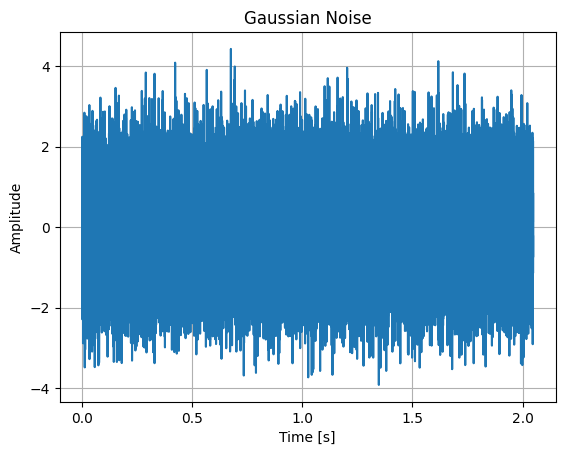

In [ ]:
# Plot Noise
plt.figure()
plt.plot(t,noise)
plt.title('Gaussian Noise')
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.grid()

In [ ]:
# Listen to Noise
ipd.Audio(noise, rate=Fs)

### Output Signal

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/TMd5Uhov12o" frameborder="0" allow="accelerometer;
encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# Convolving Noise with Black Box
y = np.convolve(noise, black_box, mode='same')

In [ ]:
# DFT of Output
y_fft = fft(y)

In [ ]:
# Listen to Output
ipd.Audio(y, rate=Fs)

### The Black Box Transfer Function (Frequency Response)

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/8IiZPBa5sQs" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# Transfer Function h_fft Y_fft / Noise_fft
h_fft = y_fft / noise_fft

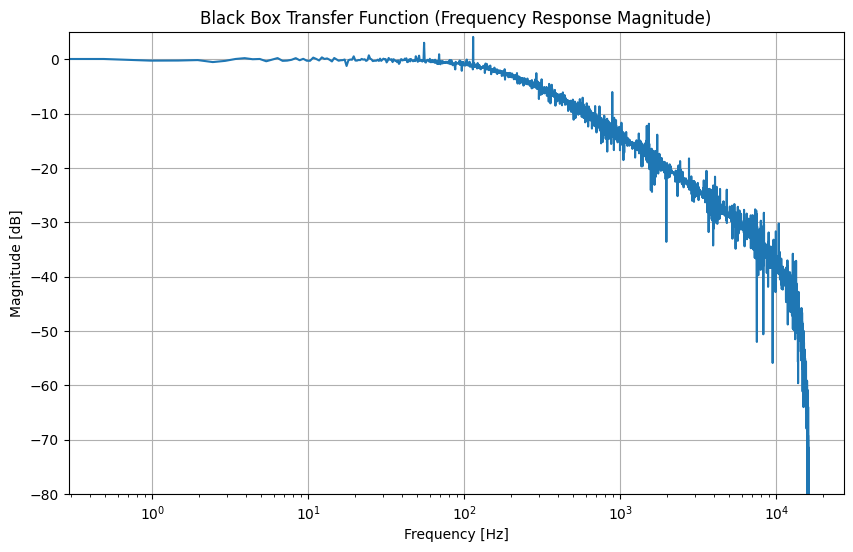

In [ ]:
# Plot Transfer Function
fig=plt.figure(figsize=(10,6))
plt.semilogx(freqs[0:NFFT//2],20*np.log10(np.abs(h_fft[0:NFFT//2])))
plt.grid()
plt.ylim((-80,5))
plt.title('Black Box Transfer Function (Frequency Response Magnitude)')
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [Hz]');

### Smoothing Filter (Moving Average)

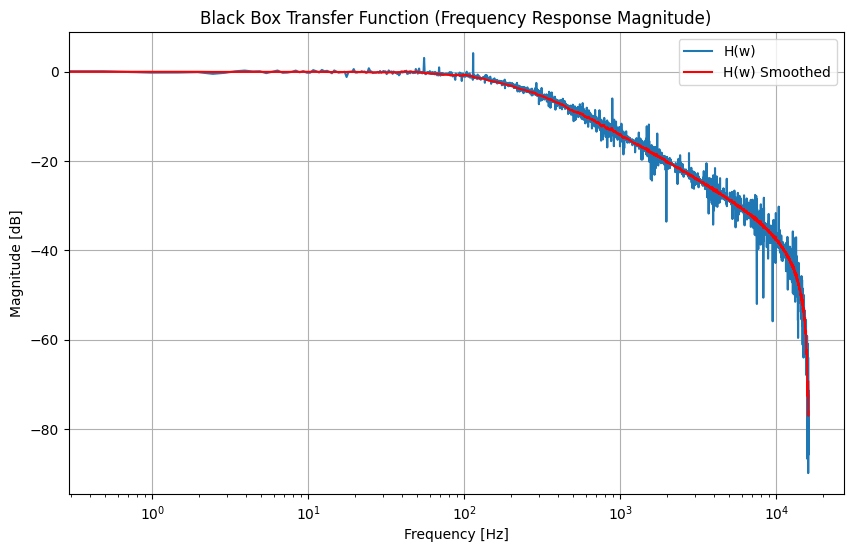

In [ ]:
# Moving Average Filter (Smoothing)
N=(2**5)
moving_ave=(1/N)*np.ones(N)
h_fft_mag_smooth=np.convolve(np.abs(h_fft),moving_ave, mode='valid')
fig = plt.figure(figsize=(10,6))
plt.title('Black Box Transfer Function (Frequency Response Magnitude)')
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.semilogx(freqs[0:NFFT//2],20*np.log10(np.abs(h_fft[0:NFFT//2])), label='H(w)')
plt.semilogx(freqs[0:NFFT//2],20*np.log10(np.abs(h_fft_mag_smooth[0:NFFT//2])),label='H(w) Smoothed',color='r')
plt.legend()
#plotly_fig = tls.mpl_to_plotly(fig)
#plotly_fig.layout.update(showlegend=True)
#plotly.offline.iplot(plotly_fig)

### Impulse Response (Inverse DFT of the Frequency Response)

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/8jXsLicCJks" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# IFFT
h = np.real(np.fft.ifft(h_fft))
h/=np.abs(h).max()
h=np.fft.ifftshift(h)
black_box/=np.abs(black_box).max()

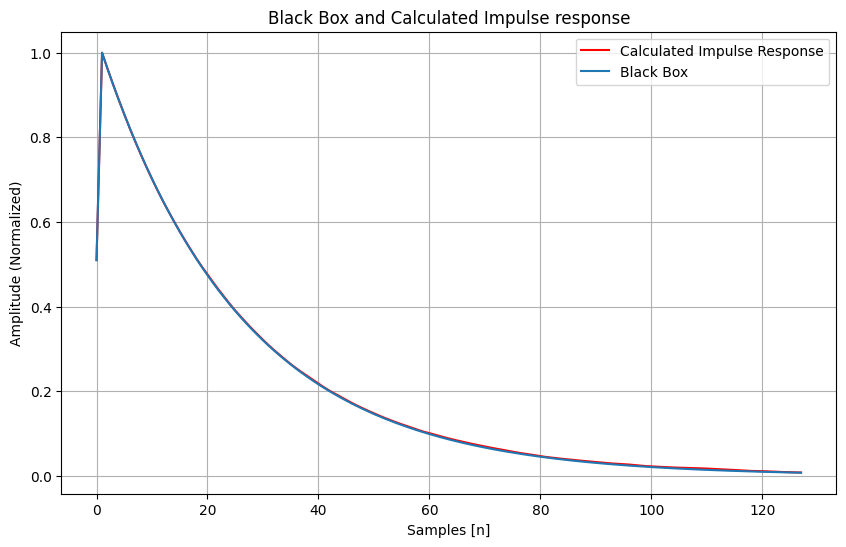

In [ ]:
# Plot Impulse Response and Black Box
fig = plt.figure(figsize=(10,6))
delay=(black_box.size-1)//2
plt.plot(h[NFFT//2-delay:NFFT//2-delay+black_box.size],'r', label='Calculated Impulse Response')
plt.plot(black_box, label='Black Box')
plt.grid()
plt.title('Black Box and Calculated Impulse response')
plt.ylabel('Amplitude (Normalized)')
plt.xlabel('Samples [n]')
plt.legend()
#plotly_fig = tls.mpl_to_plotly(fig)
#plotly_fig.layout.update(showlegend=True)
#plotly.offline.iplot(plotly_fig)

### First Order LP Butterworth Filter and the Black Box

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ns5ysfEb6yw" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# LP Filter Frequency Response
[b, a] = signal.butter(1, 200/(0.5*Fs))
print("b,a=", b,a)
w, h = signal.freqz(b,a)
f = w*0.5*Fs/(np.pi)

b,a= [0.01925927 0.01925927] [ 1.         -0.96148145]


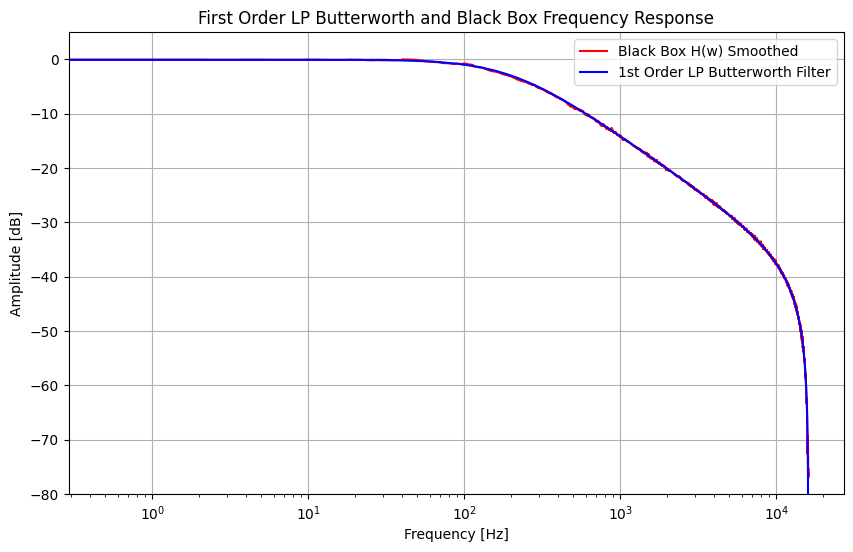

In [ ]:
# Plot Butterworth and Black Box Frequency Response
fig = plt.figure(figsize=(10,6))
plt.title('First Order LP Butterworth and Black Box Frequency Response')
plt.semilogx(freqs[0:NFFT//2],20*np.log10(np.abs(h_fft_mag_smooth[0:NFFT//2])),label='Black Box H(w) Smoothed',color='r')
plt.semilogx(f, 20 * np.log10(abs(h)), 'b', label='1st Order LP Butterworth Filter')
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.ylim((-80,5))
plt.grid()
plt.legend()
#plotly_fig = tls.mpl_to_plotly(fig)
#plotly_fig.layout.update(showlegend=True)
#plotly.offline.iplot(plotly_fig)

## Example: Obtaining the Frequency Response of a "Black Box" system using Sweeping Sinusoid

### The "Black Box" System

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Jl_q2uHUAVU" frameborder="0" allow="accelerometer;  encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
black_box_2=np.array([ 9.02657863e-02, -3.33130930e-01,  4.28459613e-01, -1.54138774e-01,
       -1.07478922e-01,  3.10625882e-02,  1.24727955e-01, -6.92087315e-02,
       -6.43154761e-02,  5.13661002e-02,  4.30394145e-02, -4.58789914e-02,
       -2.28229992e-02,  3.57991857e-02,  1.14366897e-02, -2.77217988e-02,
       -3.96086021e-03,  2.05137870e-02, -2.00186996e-04, -1.47699702e-02,
        2.37588233e-03,  1.02811331e-02, -3.25629976e-03, -6.92039857e-03,
        3.38861566e-03,  4.47675188e-03, -3.11526957e-03, -2.75747412e-03,
        2.65990606e-03,  1.58686707e-03, -2.15554195e-03, -8.19228818e-04,
        1.67661002e-03,  3.38093612e-04, -1.25907948e-03, -5.41997832e-05,
        9.15482966e-04, -9.86857166e-05, -6.44874048e-04,  1.68143162e-04,
        4.39415392e-04, -1.87282970e-04, -2.88476362e-04,  1.78365371e-04,
        1.81047265e-04, -1.55775358e-04, -1.07029762e-04,  1.28359712e-04,
        5.78156476e-05, -1.01198495e-04, -2.64372609e-05,  7.69041857e-05,
        7.48044052e-06, -5.65447943e-05,  3.11710154e-06,  4.02787488e-05,
       -8.30659947e-06, -2.77761748e-05,  1.01651617e-05,  1.84868345e-05,
       -1.01068216e-05, -1.18014560e-05,  9.05889984e-06,  7.14145693e-06,
       -7.60259616e-06, -4.00244738e-06,  6.08084880e-06,  1.96935173e-06,
       -4.67833643e-06, -7.15268241e-07,  3.47895806e-06, -8.00095481e-09,
       -2.50582985e-06,  3.82792190e-07,  1.74817568e-06, -5.38880709e-07,
       -1.17870404e-06,  5.65679875e-07,  7.64294779e-07, -5.22640193e-07,
       -4.72135714e-07,  4.47666431e-07,  2.72878320e-07, -3.63658045e-07,
       -1.41927795e-07,  2.83416491e-07,  5.96343371e-08, -2.13210350e-07,
       -1.08945857e-08,  1.55284488e-07, -1.55131215e-08, -1.09568209e-07,
        2.76647887e-08,  7.47954539e-08, -3.11897178e-08, -4.92068821e-08,
        2.98798299e-08,  3.09641329e-08, -2.61910892e-08, -1.83729088e-08,
        2.16384082e-08,  9.98431862e-09, -1.70954750e-08, -4.62279638e-09,
        1.30150181e-08,  1.37307918e-09, -9.58557616e-09,  4.52764254e-10,
        6.83950926e-09, -1.35534519e-09, -4.72481520e-09,  1.68759375e-09,
        3.15091798e-09, -1.69021313e-09, -2.01632988e-09,  1.52139091e-09,
        1.22411517e-09, -1.28053652e-09, -6.89462165e-10,  1.02652643e-09,
        3.42394670e-10, -7.91260024e-10, -1.27686327e-10,  5.89415570e-10,
        3.33100156e-12, -4.25250389e-10,  6.15826463e-11,  2.97181517e-10])

### Input Signal: The Sweeping Sinusoid

In [ ]:
# Sweeping Sinusoid
sweep = signal.chirp(t, f0=0, f1=0.5*Fs, t1=2**16*T, method='linear')
print("T=", T, "1/T=", 1/T)

T= 3.125e-05 1/T= 32000.0


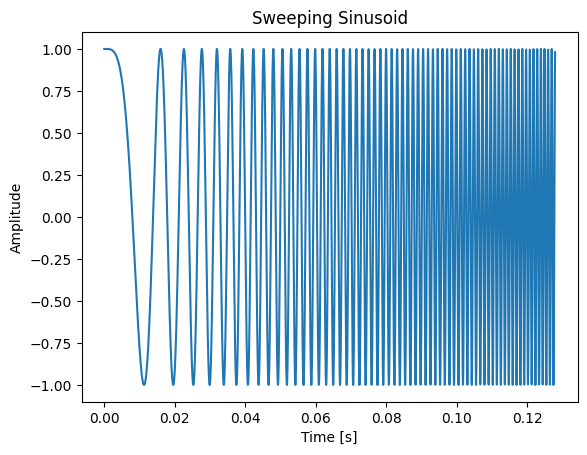

In [ ]:
# Plot the Chirp
plt.figure()
plt.plot(t[:2**12], sweep[:2**12])
plt.title('Sweeping Sinusoid')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude');

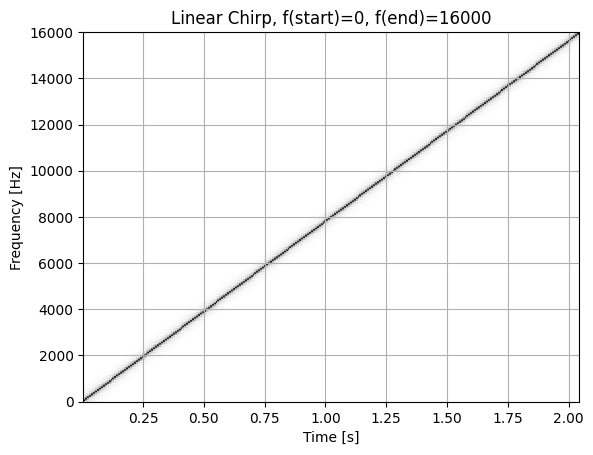

In [ ]:
# Spectrogram of Chirp
plt.figure()
ff, tt, Sxx = signal.spectrogram(sweep, fs=Fs, noverlap=256, nperseg=512,
                          nfft=2048, mode='magnitude')
plt.pcolormesh(tt, ff, Sxx, cmap='gray_r')
plt.title('Linear Chirp, f(start)=0, f(end)=16000')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.grid()

In [ ]:
# Listen to Chirp
ipd.Audio(sweep, rate=Fs)

In [ ]:
# DFT of Chirp
sweep_fft = fft(sweep)

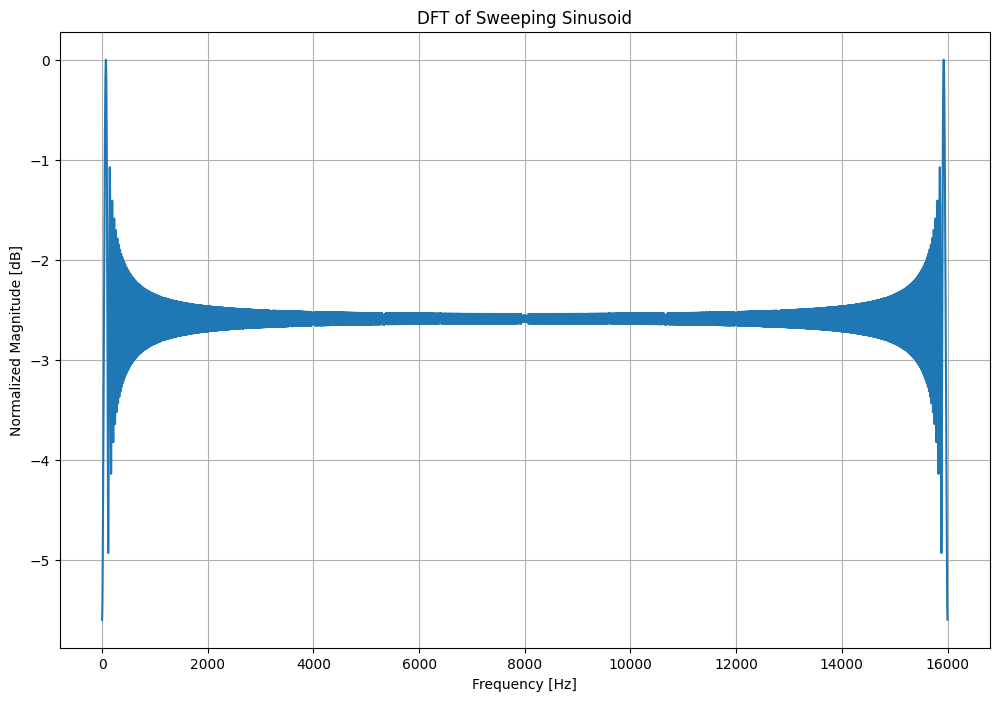

In [ ]:
# Plot the DFT of Chirp
fig=plt.figure(figsize=(12,8))
sweep_fft_normalized_mag=np.abs(sweep_fft)/np.abs(np.abs(sweep_fft)).max()
plt.plot(freqs[0:NFFT//2],20*np.log10(np.abs(sweep_fft_normalized_mag[0:NFFT//2])))
plt.grid()
plt.title('DFT of Sweeping Sinusoid')
plt.ylabel('Normalized Magnitude [dB]')
plt.xlabel('Frequency [Hz]');

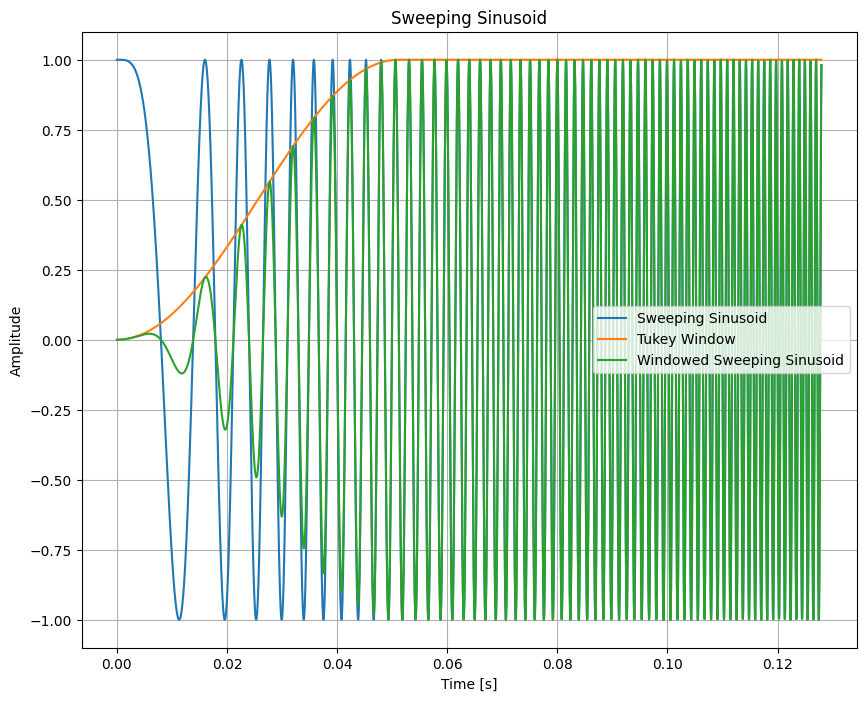

In [ ]:
# Apply a Tukey Window
tukey_window = signal.tukey(NFFT, alpha=0.05)
sweep_windowed = tukey_window*sweep
plt.figure(figsize=(10,8))
plt.plot(t[:2**12], sweep[:2**12], label='Sweeping Sinusoid')
plt.plot(t[:2**12], tukey_window[:2**12], label='Tukey Window')
plt.plot(t[:2**12], sweep_windowed[:2**12], label='Windowed Sweeping Sinusoid')
plt.title('Sweeping Sinusoid')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

In [ ]:
# Listen to Chirp
ipd.Audio(sweep_windowed, rate=Fs)

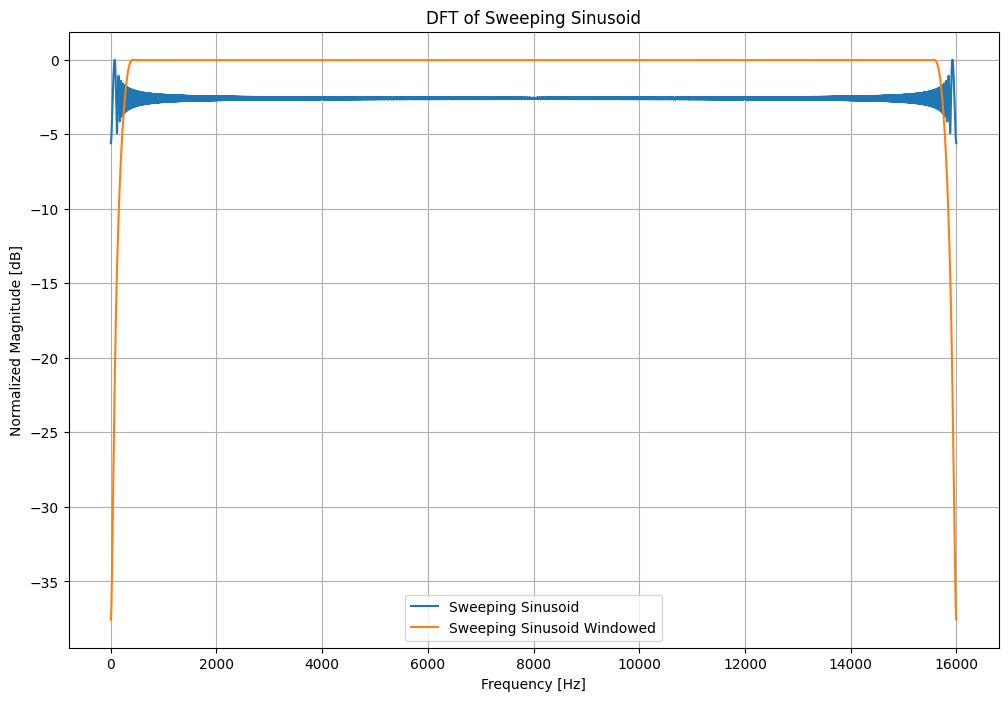

In [ ]:
# Plot the DFT of Chirp with Tukey Window
fig=plt.figure(figsize=(12,8))
sweep_fft_normalized_mag=np.abs(sweep_fft)/np.abs(np.abs(sweep_fft)).max()
sweep_windowed_fft = fft(sweep_windowed)
sweep_windowed_fft_norm_mag=np.abs(sweep_windowed_fft)/np.abs(np.abs(sweep_windowed_fft)).max()
plt.plot(freqs[0:NFFT//2],20*np.log10(np.abs(sweep_fft_normalized_mag[0:NFFT//2])), label='Sweeping Sinusoid')
plt.plot(freqs[0:NFFT//2],20*np.log10(np.abs(sweep_windowed_fft_norm_mag[0:NFFT//2])), label='Sweeping Sinusoid Windowed')
plt.grid()
plt.title('DFT of Sweeping Sinusoid')
plt.ylabel('Normalized Magnitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.legend();

### The Output

In [ ]:
# Convolving windowed chirp with Black Box
y_2 = np.convolve(sweep_windowed, black_box_2, mode='same')

In [ ]:
# DFT of the Output
y_2_fft = fft(y_2)

In [ ]:
# Listen to Output
ipd.Audio(y_2, rate=Fs)

### The Black Box Transfer Function Frequency Response

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/EgIsNJgQx8c" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# Transfer Function h_fft Y_fft / Noise_fft
h_2_fft = y_2_fft / sweep_windowed_fft

(-80.0, 5.0)

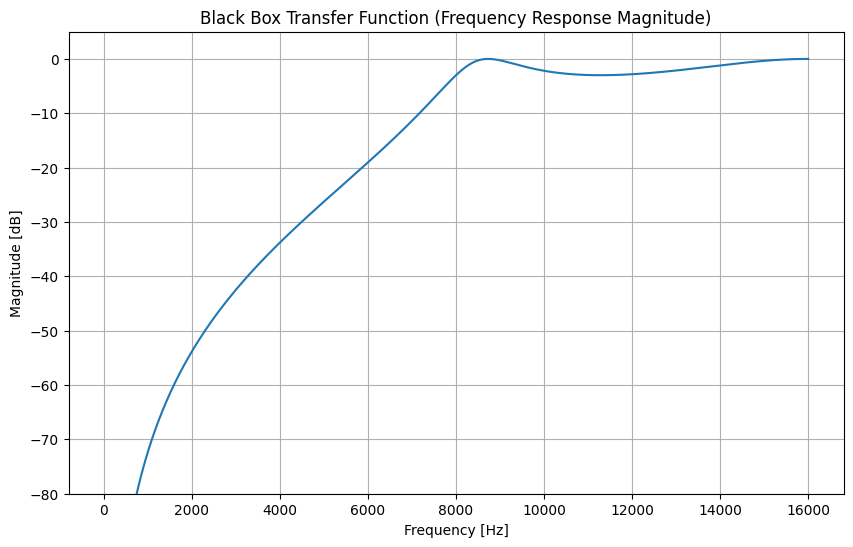

In [ ]:
# Plot the Transfer Function
fig=plt.figure(figsize=(10,6))
plt.plot(freqs[0:NFFT//2],20*np.log10(np.abs(h_2_fft[0:NFFT//2])))
plt.grid()
plt.title('Black Box Transfer Function (Frequency Response Magnitude)')
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.ylim((-80,5))
#plotly_fig = tls.mpl_to_plotly(fig)
#plotly.offline.iplot(plotly_fig)

### Third Order HP Chebyshev type I Filter and the Black Box

In [ ]:
[b, a] = signal.cheby1(3,3, 8000/(0.5*Fs),'high')
print("b, a=", b,a)
[b1,a1] = signal.butter(3,8000/(0.5*Fs),'high')
w, h = signal.freqz(b,a)
w1, h1 = signal.freqz(b1,a1)
f = w*(0.5*Fs)/(np.pi)

b, a= [ 0.09026579 -0.27079736  0.27079736 -0.09026579] [1.         0.69055589 0.80189046 0.38920828]


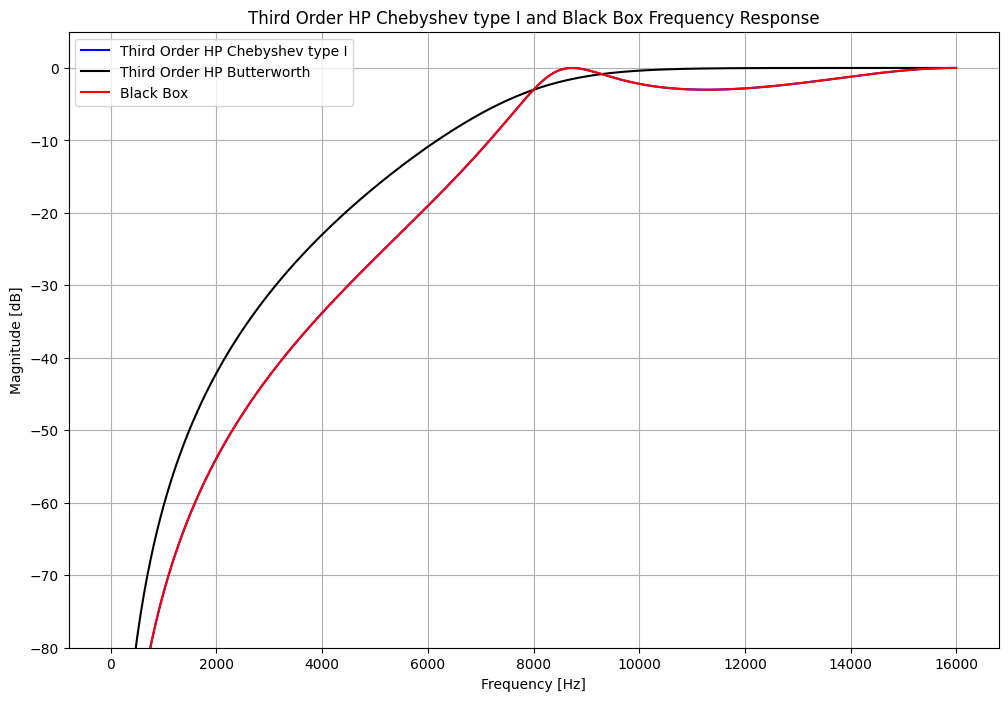

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.title('Third Order HP Chebyshev type I and Black Box Frequency Response')
plt.plot(f, 20*np.log10(abs(h)), 'b', label='Third Order HP Chebyshev type I')
plt.plot(f, 20*np.log10(abs(h1)), 'k', label='Third Order HP Butterworth')
plt.plot(freqs[0:NFFT//2],20*np.log10(np.abs(h_2_fft[0:NFFT//2])),'r', label='Black Box')
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.ylim((-80,5))
plt.grid()
plt.legend()
#plotly_fig = tls.mpl_to_plotly(fig)
#plotly_fig.layout.update(showlegend=True)
#plotly.offline.iplot(plotly_fig)

### Impulse Response (Inverse DFT of the Transfer Function)

In [ ]:
# IFFT
h_2 = np.real(np.fft.ifft(h_2_fft))
h_2/=np.abs(h_2).max()
h_2=np.fft.ifftshift(h_2)
black_box_2/=np.abs(black_box_2).max()

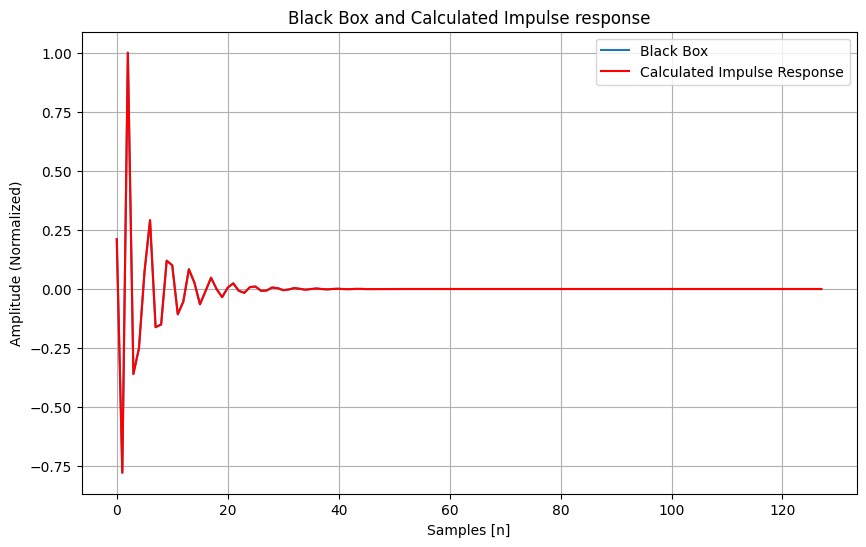

In [ ]:
# Plot Impulse Response and Black Box
fig = plt.figure(figsize=(10,6))
delay=(black_box_2.size-1)//2
plt.plot(black_box_2, label='Black Box')
plt.plot(h_2[NFFT//2-delay:NFFT//2-delay+black_box_2.size],'r', label='Calculated Impulse Response')
plt.grid()
plt.title('Black Box and Calculated Impulse response')
plt.ylabel('Amplitude (Normalized)')
plt.xlabel('Samples [n]')
plt.legend()
#plotly_fig = tls.mpl_to_plotly(fig)
#plotly_fig.layout.update(showlegend=True)
#plotly.offline.iplot(plotly_fig)

### Application Example: A Dual-Channel FFT Audio Analyzer

In [ ]:
%%html
<iframe width="560" height="340" src="https://www.youtube.com/embed/FOYi2vZZdXU" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Frequency Response: z-Transform and the DTFT

If we have the **z-Transform**, we obtain the **frequency response** of our system or signal if we replace $z=e^{j\omega}$. In this case the z-Transform becomes the DTFT (the transform formulas become identical). This is like “reading out” the z-Transform along the unit circle in the complex domain of the z-Transform:<br>
![z-ComplexPlane](https://github.com/GuitarsAI/MRSP_Notebooks/blob/master/images/zTransformCircle.jpg?raw=1)

The periodicity of our frequency domain can also be seen easily here.


Here we can see that in general we obtain a $2\pi$ periodicity in the frequency domain. For **real valued** signals, the upper half of the circle has a frequency response which is symmetric to the lower half (**conjugate complex**), and hence strictly speaking we get some sort of pi periodicity for real valued signals (hence Nyquist's Theorem which states that we only can reconstruct frequencies below half the sampling frequency for real valued signals).

Hence for real valued signals only one half of the unit circle is unique. For **complex** signals, **both** halves of the unit circle can contain different frequency responses, and hence there we indeed have $2\pi$ periodicity, and we could reconstruct frequencies up to $2\pi$.

We can **imagine complex signals** or frequencies as consisting of 2 signals, one for the real part and one for the imaginary part. For instance in stereo audio signals, the left channel could be seen as a real part and the right channel as an imaginary part of a complex audio signal. The same for negative frequencies: $e^{-j\cdot \omega \cdot n}$They consist of a cosine real part and a -sine imaginary part.

This unit circle, if it describes an input signal X(z) (for instance a certain frequency), is the input to the z-Transform H(z), by replacing the z by $e^{j\omega}$, to obtain the frequency response $H(e^{j\omega})$. You can imagine for instance the magnitude of the resulting frequency response as an additional dimension on top of this circle.

If you plot the frequency response for real valued signals, for instance in Python, what is usually done is to plot the upper half of this unit circle. For real valued signals the lower half is symmetric to it.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/NMGtwYE8veQ" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Example: Low Pass Filter as Moving Average

If our input is the signal x(n) and the output of our low pass filter is y(n), then it can be computed as

$$y( n )  =\frac{1} {2} x( n )  +\frac{1} {2} x ( n -1  )$$

What is the corresponding impulse response of this filter? It is the response of this system to a unit impulse (x(0)=1, x(n)=0 elsewhere):
<br>
$$
h( 0 )=y(0)  =\frac{1}{ 2} ,h( 1 ) =y(1)=\frac{1}{2}
$$

This can also be written as a vector:
$$h = \left[ \frac{1 }{ 2} ,\frac{1} {2}  \right]$$

Hence the output is the **convolution** with this vector, $y=x*h$.

**Observe:** The convolution or filtering operation can also be written as a multiplication of the signal vector and a so-called **Sylvester Matrix:**
$$\begin{bmatrix} {\vdots  \\ y(0) \\ y(1)\\y(2)\\ \vdots } \end {bmatrix}=\begin{bmatrix}  \vdots & \ldots & . & . \\
0.5 & 0.5 & 0 &. \\ 0 & 0.5 & 0.5 & \ldots   \\
0 & 0 & 0.5 & 0.5 \\ . & \vdots & \ldots & .\end{bmatrix}\cdot \begin{bmatrix}{x(-1)\\ x(0)\\x(1)\\ \vdots } \end{bmatrix}$$


We also use the following matrix formulation for convolution,

$$ \begin{bmatrix}\vdots  \\ y(0) \\ y(1)\\y(2)\\ \vdots \end{bmatrix} =
\begin{bmatrix}\vdots & \ldots \\
x(-1) & x(0) \\ x(0) & x(1)\\
x(1)& x(2) \\
\vdots & \ldots \end{bmatrix} \cdot \begin{bmatrix}0.5 & 0.5 \end{bmatrix}
$$

#### Example: Discrete Convolution as Matrix Multiplication (Sylvester Matrix)

In [ ]:
from sympy import Matrix
# Impulse response:
h=np.array([0.5,0.5])
# Test Signal
test_signal=np.array([1,2,3,4,5,6])

In [ ]:
# Sylvester Matrix
h_pad=np.pad(h,(0,test_signal.size-h.size),mode='constant',constant_values=0)
sylvester = []
for k in range(test_signal.size-1):
    sylvester.append(np.roll(h_pad,k))
sylvester=np.array(sylvester)
Matrix(sylvester)

Matrix([
[0.5, 0.5,   0,   0,   0,   0],
[  0, 0.5, 0.5,   0,   0,   0],
[  0,   0, 0.5, 0.5,   0,   0],
[  0,   0,   0, 0.5, 0.5,   0],
[  0,   0,   0,   0, 0.5, 0.5]])

In [ ]:
# Convolution
y_sylvester=np.array(sylvester)@test_signal
print('Convolution as Matrix Multiplication:',y_sylvester)
print('Numpy Convolve:', np.convolve(h,test_signal,'valid'))

Convolution as Matrix Multiplication: [1.5 2.5 3.5 4.5 5.5]
Numpy Convolve: [1.5 2.5 3.5 4.5 5.5]


In [ ]:
# Example: Sweep * Black_Box_2
def input_shaper(h, x):
    x_pad=np.pad(x,h.size-1,mode='constant',constant_values=0)
    alist=[]
    for k in range(h.size):
        alist.append(x_pad[k:x.size+k])
    return np.array(alist).T

In [ ]:
# Reshape Input
x_input=input_shaper(black_box_2,sweep)

In [ ]:
#Convolution
y_out=x_input@black_box_2
ipd.Audio(y_out, rate=Fs)

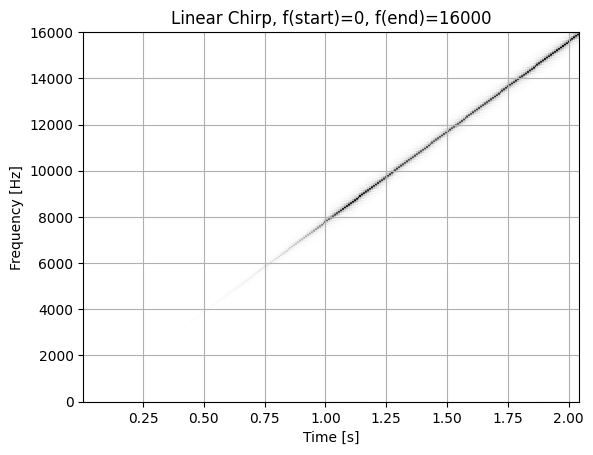

In [ ]:
# Plot Output
plt.figure()
y_out/=np.abs(y_out).max()
ff, tt, Sxx = signal.spectrogram(y_out, fs=Fs, noverlap=256, nperseg=512,
                          nfft=2048, mode='magnitude')
plt.pcolormesh(tt, ff, Sxx,cmap='gray_r')
plt.title('Linear Chirp, f(start)=0, f(end)=16000')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.grid()

What is the frequency response of this moving average low pass filter? The z-transform of this filter is

$$ H(z)=\sum_{n=0} ^  \infty h
(n) z^{-n}= 0.5 \cdot z^{-0}+0.5 \cdot z^{-1}$$

Replacing $z$ by $e^{j\omega}$gives us the frequency response of this low pass filter,

$$
H ( ω  )  = \sum_{n=-∞} ^ ∞ {h ( n )  e^{- j n \omega}} =0.5 +0.5  e^{- j\omega}
$$

This is the complex frequency response. Often we are interested in the magnitude (or absolute value) of this frequency response, because we would like to see how much a signal at a certain frequency is attenuated. An example might be an equalizer filter, which has the goal to obtain an overall frequency response which has a flat magnitude, for instance to equalize an audio amplifier. If the amplifier has e.g. an attenuation of 0.5 at a certain frequency, we need the equalizer filter to have an amplification of magnitude 2 at that frequency. In this way we obtain a constant magnitude of amplification at all frequencies. But observe that the phase of our complex frequency response can still be different for all frequencies.
So our magnitude frequency response is,
$$\mid {H  (  ω  )}\mid   =\mid {0.5 + 0.5 e^{- j ω}} \mid$$

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/mggLgzKzKt0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

#### We can compute the frequency response using Python, using the z-Transform:

In [ ]:
from sympy import *
import numpy as np
z=Symbol('z', complex=True)

In [ ]:
# z-Transform:
Hz=Poly(np.flipud(h), z**(-1))
Hz

Poly(0.5*(1/z) + 0.5, 1/z, domain='RR')

In [ ]:
# Frequency Response
#The desired omegas, 100 sample points of angle between 0 and pi:
omega=np.linspace(0,np.pi, 100)

In [ ]:
# Initialize freq. Resp. with complex zeros:
H=np.zeros(len(omega))*1j

In [ ]:
# Replace z by exp(-1j*omega) (we replace z^-1 in the argument):
for k in range(len(omega)):
    H[k]=Hz(np.exp(-1j*omega[k]))

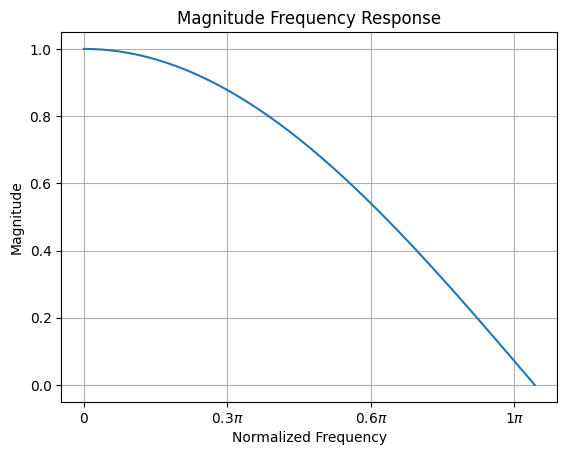

In [ ]:
# Magnitute Response
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig = plt.figure()
plt.plot(omega,abs(H))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Frequency Response')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=1))
#plotly_fig = tls.mpl_to_plotly(fig)
#plotly_fig.layout.update(title_text="Filter Output DFT")
#plotly.offline.iplot(plotly_fig)

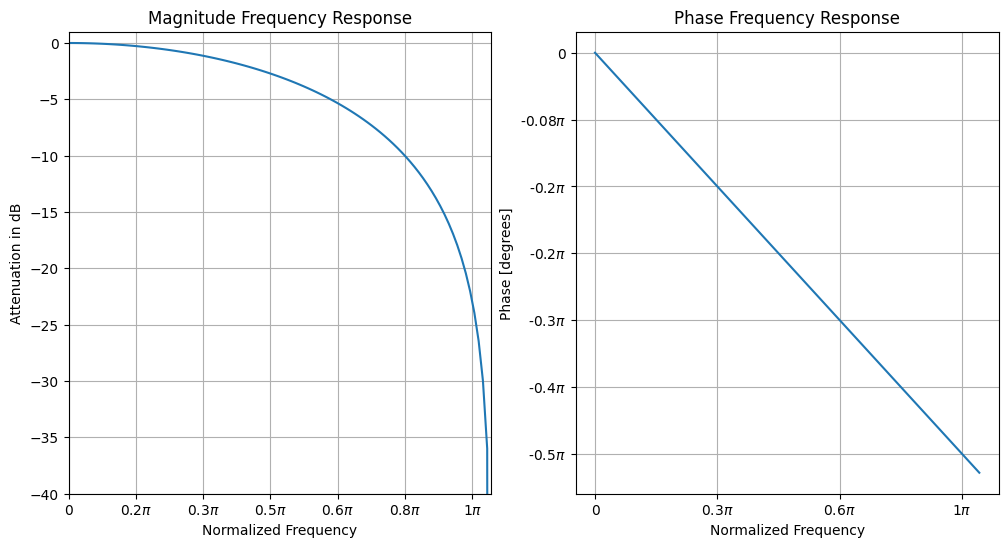

In [ ]:
# The dB scale for the magnitude shows more detail in the stop band:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(omega,20*np.log10(np.abs(H)))
plt.axis([0,3.14,-40,1])
plt.xlabel('Normalized Frequency')
plt.ylabel('Attenuation in dB')
plt.title('Magnitude Frequency Response')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
plt.grid()

plt.subplot(1,2,2)
plt.plot(omega,np.angle(H, deg=False))
plt.xlabel('Normalized Frequency')
plt.ylabel('Phase [degrees]')
plt.title('Phase Frequency Response')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=1))
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_locator(MultipleLocator(base=0.25))
plt.grid()

#### Using 'freqz' Function

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/GFPm8ewv0jU" frameborder="0" allow="accelerometer; auencrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

“freqz” uses the zero padded signal h and applies a DFT to it. The zero padding is done to obtain the desired length, for the desired frequency resolution. By default it only computes the positive freuqencies.
Here H is an array of the complex values of the frequency response, and omega is an array containing the normalized frequencies at which the frequency response was evaluated.

We see that at frequency 0 the magnitude response has the magnitude 1, hence no attenuation (important for a low pass). At frequency $\omega = \pi$ it has magnitude 0, which is also suitable for a **low pass**. In between it behaves like a cosine does, it slowly reduces, so not really like a perfect low pass, which should have frequency response which looks more like brick shaped (1 at the entire passband, 0 at the entire stop band, ideally). So it is **far from** being a **perfect** low pass filter.

We also have the phase of the frequency response. We see that it is linear function, which is particularly important for image processing. The phase is the angle of $H(\omega)$.

The vertical axis on a dB scale let us see the **small values of the stop band** better, which works for both power and voltage/current. <br>
Observe: The dB numbers are using the input of the filter as a reference. Hence the dB number results from 20*log10 of output “voltage” over input “voltage”.

Now also observe the **phase** plot. We see the phase response is $\omega/2$, which is linear in with a slope of ½, which is why we have a **linear phase** in this case. Hence we also call our filter a **linear phase filter**.

In [ ]:
# Freqz
omega, H = signal.freqz(h, worN=100)

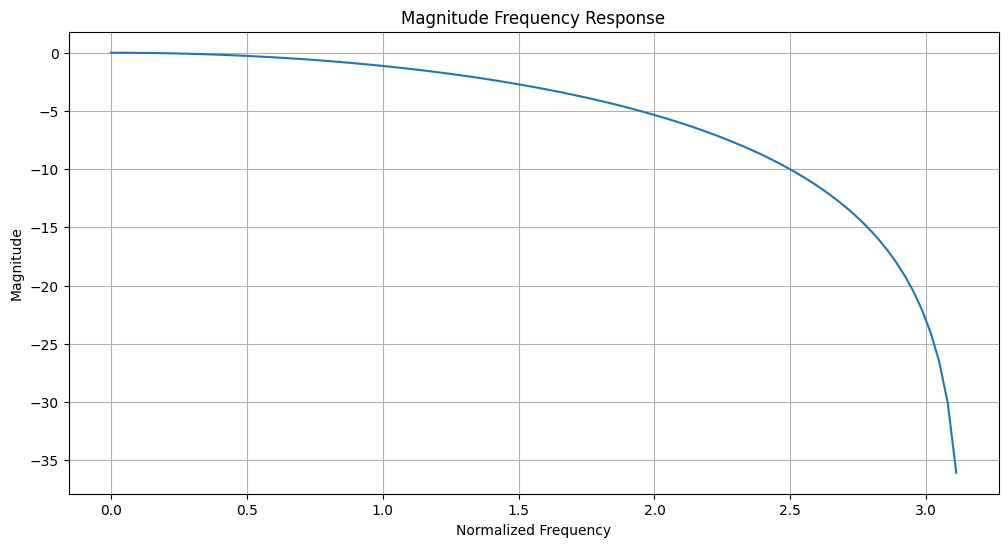

In [ ]:
fig=plt.figure(figsize=(12,6))
plt.plot(omega,20*np.log10(np.abs(H)))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Frequency Response')
plt.grid()
#plotly_fig = tls.mpl_to_plotly(fig)
#plotly_fig.layout.update(title_text="Filter Output DFT")
#plotly.offline.iplot(plotly_fig)

#### Using Scipy Signal and Python Control Library

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/__Efg0VN5CQ" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# Poles Zeros and Gain
print(ratsimp(Hz.as_expr())) #"as_expr() is needed to convert the polynomial to an expression type"
n,d=fraction(factor(cancel(ratsimp(Hz.as_expr())))) #"ratsimp" computes a fraction of polynomials n(z)/d(z), as expression types
print("n=", n)
print("d=", d)
poles = np.array((Poly(d).all_roots())).astype(complex)
print("poles=", poles)
zeros = np.array(Poly(n).all_roots()).astype(complex)
print("zeros=", zeros)
gain = np.array(n.args[0]).astype(complex)

0.5 + 0.5/z
n= 0.5*z + 0.5
d= z
poles= [0.+0.j]
zeros= [-1.+0.j]


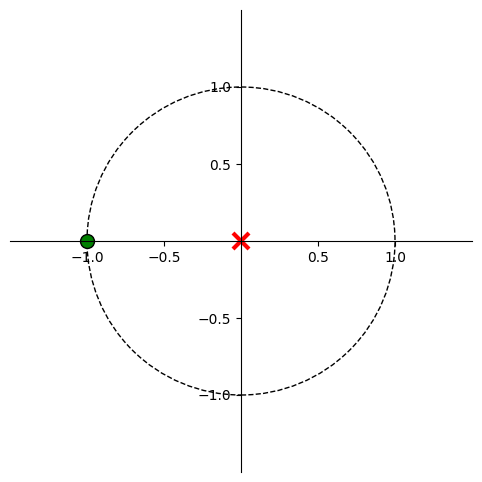

In [ ]:
# Plot Poles and Zeros
from  matplotlib import patches
plt.figure(figsize=(10,6))
ax = plt.subplot(111)
r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)
# Unit Circle
uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
ax.add_patch(uc)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Plot Zeros
t1 = plt.plot(zeros.real, zeros.imag, 'go', ms=10)
plt.setp( t1, markersize=10.0, markeredgewidth=1.0, markeredgecolor='k', markerfacecolor='g')
# Plot Poles
t2 = plt.plot(poles.real, poles.imag, 'rx', ms=10)
plt.setp( t2, markersize=12.0, markeredgewidth=3.0,markeredgecolor='r', markerfacecolor='r');

In [ ]:
# Create System
ZPK = signal.ZerosPolesGain(zeros,poles,gain,dt=T)

In [ ]:
# Convert from Scipy to Control Library
!pip install control
b,a=signal.zpk2tf(zeros, poles, gain)
from control import pzmap, TransferFunction
TF_Moving_Average=TransferFunction(b,a,T)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 4.9 MB/s eta 0:00:00


array([[list([<matplotlib.lines.Line2D object at 0x7bdabd7b3d30>]),
        list([<matplotlib.lines.Line2D object at 0x7bdabd780040>])]],
      dtype=object)

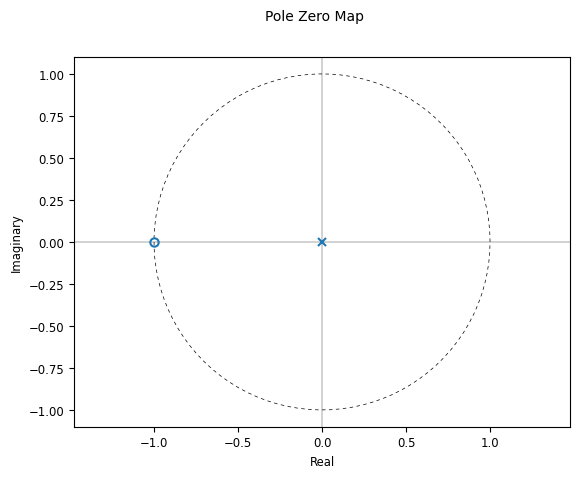

In [ ]:
# Plot Pole Zero Map
pzmap(TF_Moving_Average, grid=False, title='Pole Zero Map')

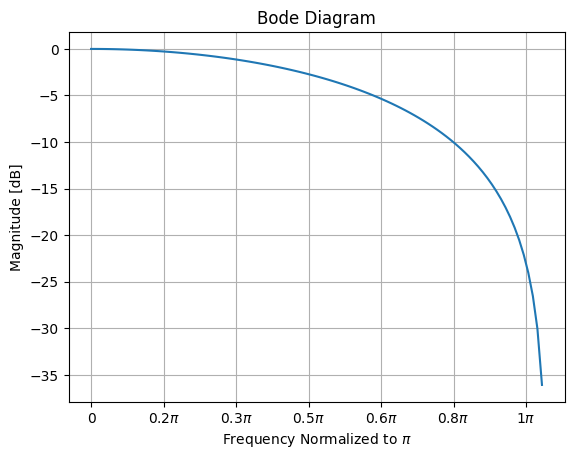

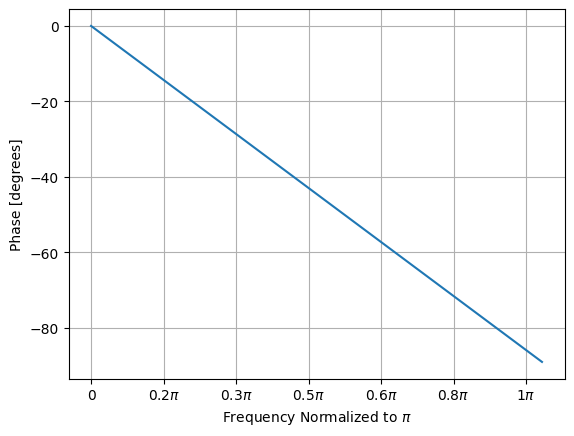

In [ ]:
# Plot Bode Diagram
w, mag, phase = signal.dbode(ZPK, n=100)
plt.figure()
plt.plot(w/Fs, mag)    # Bode magnitude plot
plt.title('Bode Diagram')
plt.xlabel('Frequency Normalized to $\pi$')
plt.ylabel('Magnitude [dB]')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
plt.grid()
plt.figure()
plt.plot(w/Fs, phase)  # Bode phase plot
plt.grid()
plt.xlabel('Frequency Normalized to $\pi$')
plt.ylabel('Phase [degrees]')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
plt.show()

## Complex Conjugate Symmetry

Observe that the frequency response is **symmetric** around frequency 0. This is the result of **real valued impulse responses**. To see why we get this **symmetry**, assume we change $\omega$ to $-\omega$, we obtain

$$
 H (  - ω ) = \sum _ {n= -  \infty } ^ { \infty  }  {h ( n )  \cdot e ^ {-jn(  - ω ) } }   
$$

If we change the sign of the exponent in the above equation, it is equivalent to taking the conjugate complex value:
$$ {e ^ { { - jω} } = {\overline  {e ^{ {jω} } }} } $$
where the overbar $ \overline{} $ means “conjugate complex”. <br>
(remember: )
$$
\overline{e^{j\omega}}=\overline{cos(\omega) +j sin(\omega)}=cos(\omega) -j sin(\omega)=e^{-j\omega}
$$
Taking the conjugate complex means to change the sign of the imaginary part. Changing the sign of the complex exponential number means to rotate in the opposite direction, and this exactly corresponds to changing the sign of the resulting complex number.

$$
H (-\omega) = \sum _ {{n= -  \infty } }  ^ {{ \infty } }{h ( n ) e ^ {{ -  jn (  - \omega ) } } } = \sum _ {{n= -  \infty } }  ^ { { \infty } } \overline  {h ( n ) } {\overline  {e ^ { -  jn\omega} } } = \overline  {H ( \omega ) }
$$

This is true because the complex conjugate does not change the **real valued** numbers h(n). It now shows the conjugate symmetry between **negative and positive** frequencies if we have real valued impulse responses.

**In summary:** If we have real valued impulse response, the **positive and negative** frequency responses are **conjugate complex** of each other.

Observe that this does not change the magnitude of our frequency response, only the phase!
Also observe that this symmetry is **no longer true** if we have **complex** valued impulse responses!


## dB Revision

**Remark:** You need to be familiar with **dB computations**. You need to be able to answer e.g. following questions:

- What is the definition of dB for voltage and for power?
- What is the („voltage“) ratio of 0.1 in dB?
- What is the (voltage) ratio of -20 dB?
- What is the (voltage) ratio of 6 dB?
- You have 2 systems in a row, the first with -6 dB attenuation, the next with -10 dB attenuation. What is the total atennuation?

If you have trouble with one of the questions, look it up at Wikipedia or in literature.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/wxJ_qc7apSQ" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Input Signals

In [ ]:
### Input Signals

# Sine 50 Hz 2 Amplitude
sine_50_2 = 2 * np.sin(2*np.pi*50*t)

# Cosine 2000 Hz 10 Amplitude Phase
cos_2000_10 = 10 * np.cos(2*np.pi*2000*t)

# Input Signal Sine + Cosine
input_signal = sine_50_2 + cos_2000_10

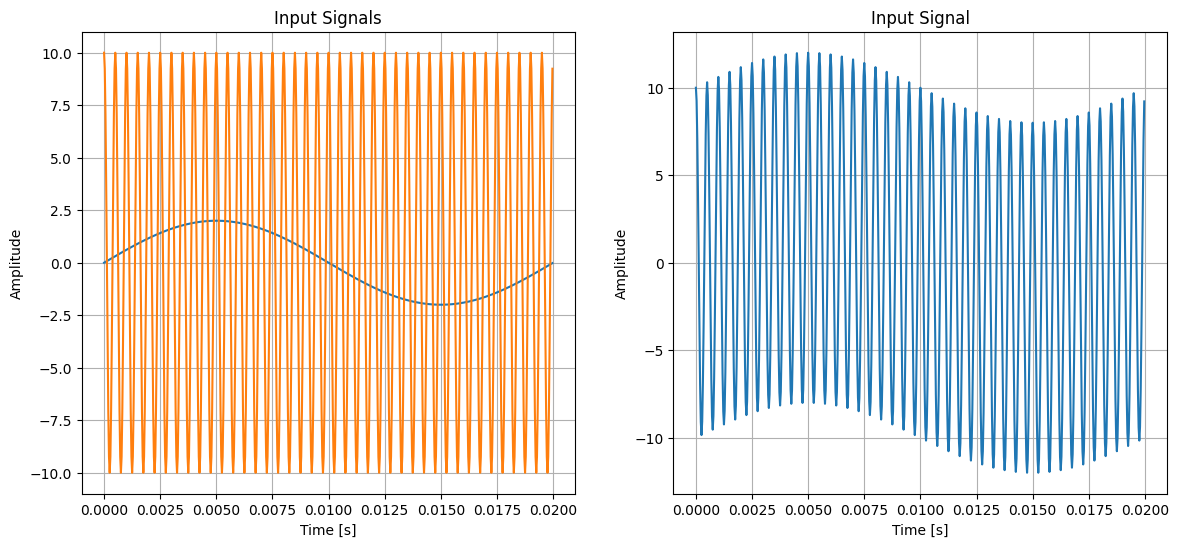

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(t[:640],sine_50_2[:640], label='Sine')
plt.plot(t[:640],cos_2000_10[:640], label='Cosine')
plt.title('Input Signals')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.subplot(1,2,2)
plt.plot(t[:640],input_signal[:640], label='Input Signal')
plt.title('Input Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

In [ ]:
# DFT of Input Signal
from scipy.fftpack import fft, ifft
input_signal_fft = fft(input_signal, n=NFFT)
input_signal_fft_mag_norm = np.abs(input_signal_fft)*(2/NFFT)
input_signal_fft_phase = np.angle(input_signal_fft, deg=True)

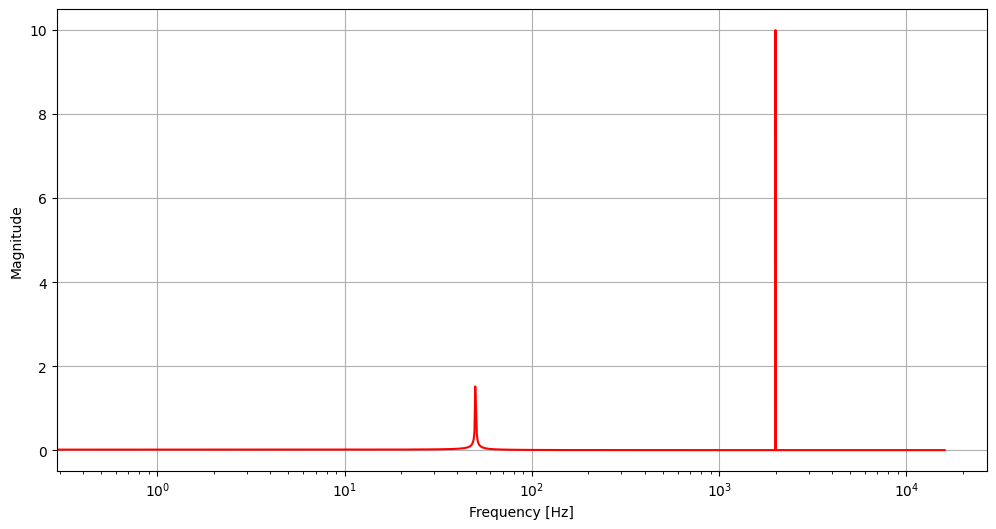

'\nplotly_fig = tls.mpl_to_plotly(fig)\n#plotly_fig.update_layout(title_text="Input Signal DFT")\nplotly_fig[\'layout\'].update(title="Input Signal DFT")\n\nplotly.offline.iplot(plotly_fig)\n#py.iplot(plotly_fig)\n'

In [ ]:
# Plot DFT of Input
fig = plt.figure(figsize=(12,6))
plt.ylabel('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.semilogx(freqs[0:NFFT//2],input_signal_fft_mag_norm[0:NFFT//2],'r')
plt.grid()

plt.show()
"""
plotly_fig = tls.mpl_to_plotly(fig)
#plotly_fig.update_layout(title_text="Input Signal DFT")
plotly_fig['layout'].update(title="Input Signal DFT")

plotly.offline.iplot(plotly_fig)
#py.iplot(plotly_fig)
"""

In [ ]:
# Windowing
flattop_win = signal.flattop(NFFT)
input_signal_win = input_signal * flattop_win
input_singnal_win_fft = fft(input_signal_win, n=NFFT)
input_singnal_win_fft_mag_norm = np.abs(input_singnal_win_fft)*(2/NFFT)/(flattop_win.mean())
input_singnal_win_fft_phase = np.angle(input_singnal_win_fft)

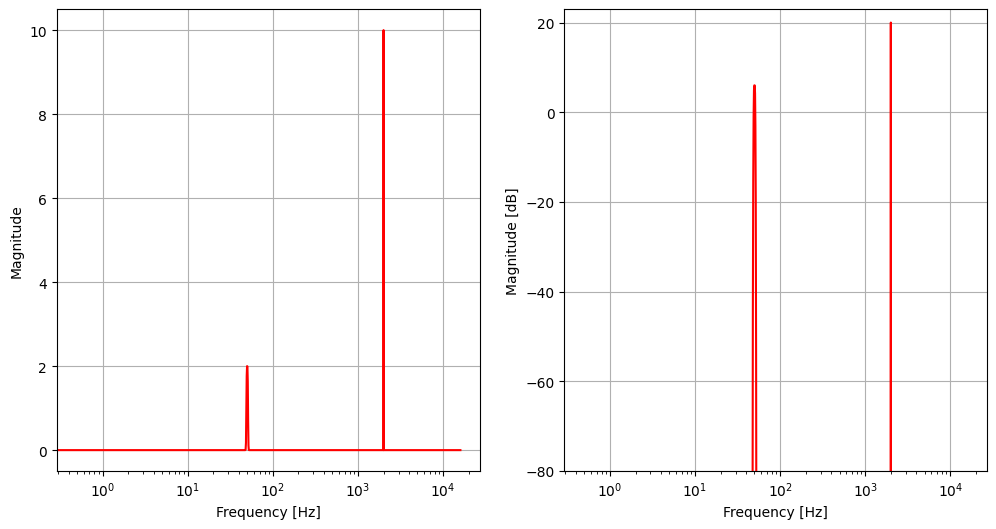

'\nplotly_fig = tls.mpl_to_plotly(fig)\nplotly_fig.layout.update(title_text="WIndowed Input Signal DFT")\nplotly.offline.iplot(plotly_fig)\n'

In [ ]:
fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.ylabel('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.semilogx(freqs[0:NFFT//2],input_singnal_win_fft_mag_norm[0:NFFT//2],'r')
plt.grid()

plt.subplot(1,2,2)
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.semilogx(freqs[0:NFFT//2],20*np.log10(input_singnal_win_fft_mag_norm[0:NFFT//2]),'r')
plt.grid()
plt.ylim((-80,23))
plt.show()
"""
plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig.layout.update(title_text="WIndowed Input Signal DFT")
plotly.offline.iplot(plotly_fig)
"""

In [ ]:
#### dB
from sympy import symbols, Eq, N
V1, V2, dB_V, P1, P2, dB_P = symbols('V1 V2 dB_V P1 P2 dB_P', real=True)
dB_V_Eq = Eq(dB_V,20*log(V2/V1,10))
dB_P_Eq = Eq(dB_P,10*log(P2/P1,10))
display(dB_V_Eq)
display(dB_P_Eq)

Eq(dB_V, 20*log(V2/V1)/log(10))

Eq(dB_P, 10*log(P2/P1)/log(10))

In [ ]:
display(N(dB_V_Eq.subs({V2:2,V1:1}),2))

Eq(dB_V, 6.0)

### Filters

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/y_quuUCNEHg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# Filters
[b,a] = signal.butter(2,200/(0.5*Fs))
[b1,a1] = signal.butter(1,1000/(0.5*Fs),'high')
w, h = signal.freqz(b, a,worN=NFFT, whole=True)
w1, h1 = signal.freqz(b1, a1,worN=NFFT, whole=True)
f = w*(0.5*Fs)/(np.pi)

# Gain
h*=10

# Total h
h_total = h* h1

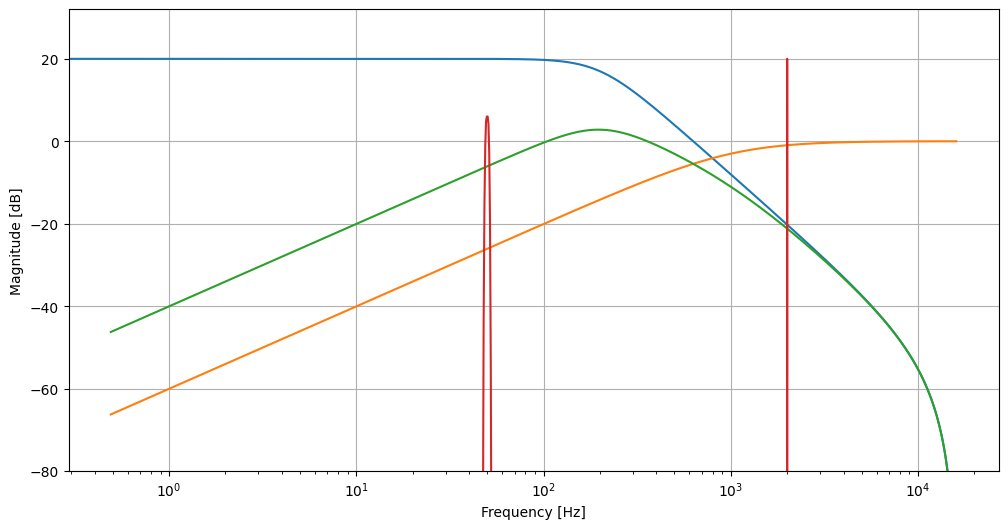

'\nplotly_fig = tls.mpl_to_plotly(fig)\nplotly_fig.layout.update(showlegend=True, title_text="Filters Frequency Response")\nplotly.offline.iplot(plotly_fig)\n'

In [ ]:
# Plot Filters Frequency Response
fig = plt.figure(figsize=(12,6))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.semilogx(f[0:NFFT//2],20*np.log10(np.abs(h[0:NFFT//2])),label='LP Filter')
plt.semilogx(f[0:NFFT//2],20*np.log10(np.abs(h1[0:NFFT//2])), label='HP Filter')
plt.semilogx(f[0:NFFT//2], 20*np.log10(np.abs(h_total[0:NFFT//2])), label='Cascaded Filters')
plt.semilogx(freqs[0:NFFT//2],20*np.log10(input_singnal_win_fft_mag_norm[0:NFFT//2]), label='Input Signal')
plt.ylim(bottom=-80)
plt.grid()
plt.show()
"""
plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig.layout.update(showlegend=True, title_text="Filters Frequency Response")
plotly.offline.iplot(plotly_fig)
"""

### Filter Output

In [ ]:
# Filtering in the Frequency Domain
y_fft = input_singnal_win_fft * h_total
y_fft_mag_norm = np.abs(y_fft)*(2/NFFT)/(flattop_win.mean())
y_fft_phase = np.angle(y_fft)

In [ ]:
# Solve dB Equation for V2
y_out_amp= solve(dB_V_Eq, V2)[0]
y_out_amp

10**(dB_V/20)*V1

In [ ]:
# Calculate new Amplitude after Filtering
print('New Amplitude of 50 Hz Component:')
display(y_out_amp.subs({V1:2,dB_V:-6.025}).evalf(4))
print('New Amplitude of 2000 Hz Component:')
display(y_out_amp.subs({V1:10,dB_V:-21.175}).evalf(4))

New Amplitude of 50 Hz Component:


0.9995

New Amplitude of 2000 Hz Component:


0.8735

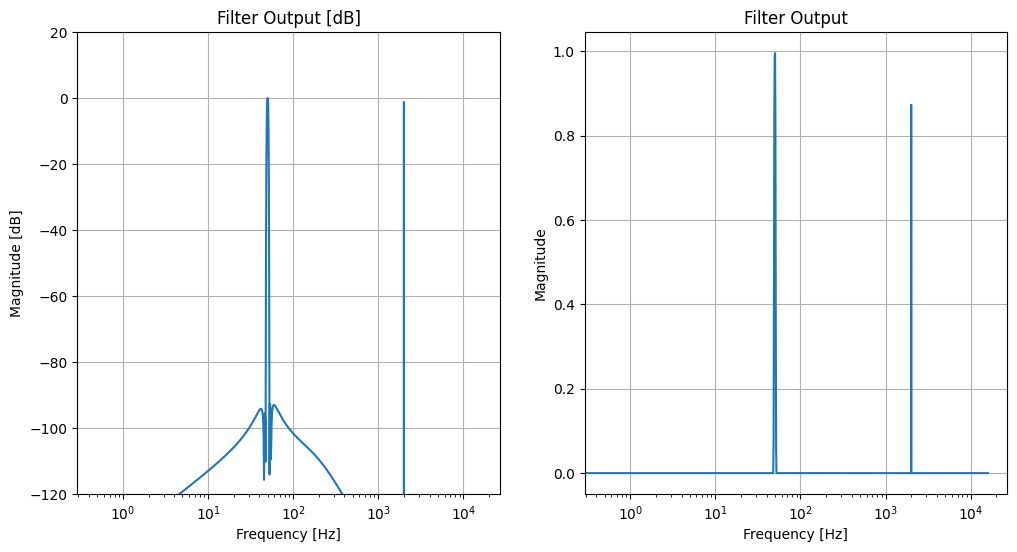

'\nplotly_fig = tls.mpl_to_plotly(fig)\nplotly_fig.layout.update(title_text="Filter Output DFT")\nplotly.offline.iplot(plotly_fig)\n'

In [ ]:
# Plot Filter Output
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Filter Output [dB]')
plt.semilogx(freqs[0:NFFT//2],20*np.log10(y_fft_mag_norm[0:NFFT//2]))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.ylim((-120,20))
plt.subplot(1,2,2)
plt.semilogx(freqs[0:NFFT//2],y_fft_mag_norm[0:NFFT//2])
plt.title('Filter Output')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()
"""
plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig.layout.update(title_text="Filter Output DFT")
plotly.offline.iplot(plotly_fig)
"""